# PCA + OLS estimation: DFM
---

> A partir dos componentes principais, que são os estimadores dos fatores, extraídos no script 'dfm_pca.ipynb', podemos estimar o primeiro modelo por MQO, em uma regressão do PIB em k fatores.

## Bibliotecas

In [21]:
import pandas as pd
import numpy as np
import datetime as dt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

from stargazer.stargazer import Stargazer
import matplotlib.pyplot as plt

## Carregando os dados 

In [22]:
# Carregando dados tratados e separando a variável-alvo: o PIB

data = pd.read_csv('../../data/data_tf.csv')
# data['Date'] = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC') --> se fosse para trimestre 
data['Date'] = pd.date_range(start = '2002-01-01', end = '2022-09-01', freq = 'MS')
data.set_index('Date', inplace = True)
gdp = data['gdp']
qgdp = (gdp.groupby(pd.PeriodIndex(gdp.index, freq = 'Q'), axis = 0)).mean()
qgdp

Date
2002Q1     NaN
2002Q2    4.78
2002Q3    4.09
2002Q4   -0.26
2003Q1   -5.66
          ... 
2021Q3    4.42
2021Q4   -0.76
2022Q1   -0.46
2022Q2    3.12
2022Q3    4.40
Freq: Q-DEC, Name: gdp, Length: 83, dtype: float64

In [23]:
# Carregando os dados tranformados com PCA

data_pca = pd.read_csv('../../data/data_tfpca.csv')
# data['Date'] = pd.date_range(start = '2002-03-01', end = '2022-09-01', freq = 'QS-DEC') --> se fosse para trimestre 
data['Date'] = pd.date_range(start = '2002-01-01', end = '2022-09-01', freq = 'MS')
data_pca.set_index('Date', inplace = True)
data_pca.columns = data_pca.columns.str.replace(r"[C]", "F")
data_pca

C:\Users\HENRI\AppData\Local\Temp\ipykernel_10468\3990215449.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data_pca.columns = data_pca.columns.str.replace(r"[C]", "F")


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F144,F145,F146,F147,F148,F149,F150,F151,F152,F153
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-01,0.043761,-0.301327,0.281876,-0.469964,-0.480213,0.267495,4.052348,-1.266854,1.604325,-0.029623,...,-0.019268,-0.011269,0.016385,0.005315,0.001778,-0.003904,0.002835,-0.008273,0.000115,-0.000836
2002-02-01,-1.349206,-0.550805,0.872002,1.933582,-1.591338,2.024872,3.075690,-1.082151,1.912396,0.327998,...,-0.005614,-0.005969,0.004629,0.001635,-0.001375,0.000777,0.000238,0.001074,-0.000113,0.000139
2002-03-01,2.921580,2.328693,0.027064,0.010019,0.273320,-0.980296,3.500098,-1.881021,0.807566,-0.224126,...,-0.002009,-0.001144,-0.009077,0.000726,-0.000015,0.005581,0.000153,0.000019,-0.000366,0.000013
2002-04-01,0.364593,1.489715,1.174915,0.080800,0.057597,0.565341,2.975339,-0.501164,2.160204,0.724248,...,0.008764,0.003876,-0.006997,0.001256,0.000781,0.004618,0.000676,-0.000453,-0.000656,0.000220
2002-05-01,-0.021967,-0.240064,-0.508700,0.346847,-1.195284,0.596571,2.105202,-1.360489,1.832412,-2.509840,...,-0.005855,-0.002427,0.009588,0.003823,-0.008100,-0.001832,-0.000813,-0.000200,0.000281,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,5.656367,3.587253,-2.324899,-1.407377,-1.077000,-0.319084,0.803622,1.423434,0.346798,-5.502160,...,-0.007328,0.002691,0.002994,-0.015947,0.000663,0.001475,0.002949,-0.000332,0.000137,-0.000122
2022-06-01,-1.250367,-1.734443,0.124854,-0.019953,-3.158825,-2.717110,1.054606,4.052564,-4.752051,-3.012939,...,0.010011,-0.007922,-0.009917,-0.010737,-0.002821,0.003087,0.002478,-0.000240,0.000248,0.000119
2022-07-01,1.715190,1.555140,-1.784176,3.606715,4.031505,-0.911592,-1.827816,-1.529660,2.326015,1.587895,...,0.001867,0.009011,-0.006219,-0.001837,-0.000040,0.001809,-0.002318,0.000064,-0.000011,0.000101


## Preparando as variáveis

In [24]:
# Agrupando os fatores pela média para ficar na mesma frequência do PIB e preenchendo a primeira observação do PIB com a mediana 

qdata_pca = (data_pca.groupby(pd.PeriodIndex(data_pca.index, freq = 'Q'), axis = 0)).mean()
# qdata_pca.to_csv('../../data/qdata_tfpca.csv')
new_data = pd.merge(qgdp, qdata_pca, how='inner', left_index=True, right_index=True)
new_data.gdp.fillna(new_data.gdp.median(), inplace = True)
new_data

,gdp,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F144,F145,F146,F147,F148,F149,F150,F151,F152,F153
Date,,,,,,,,,,,,,,,,,,,,,
2002Q1,0.60,0.538712,0.492187,0.393648,0.491212,-0.599411,0.437357,3.542712,-1.410008,1.441429,...,-0.008964,-0.006128,0.003979,0.002559,0.000129,0.000818,0.001075,-2.393479e-03,-0.000121,-2.279415e-04
2002Q2,4.78,-0.442968,-0.049328,-0.098923,0.011377,-0.766521,0.555046,2.055331,-1.683349,2.263962,...,-0.001609,0.000378,-0.002322,-0.000837,-0.002199,0.000739,0.000213,3.151107e-04,-0.000076,1.001810e-04
2002Q3,4.09,0.424707,-0.647956,0.217876,-4.446846,-1.604402,1.708108,2.452098,0.985706,2.723189,...,0.001059,0.004871,0.000425,-0.004247,-0.002138,0.001481,-0.001209,8.372003e-05,-0.000030,4.005423e-07
2002Q4,-0.26,-0.232993,-2.268012,6.315600,-11.643441,-3.549546,1.241341,2.347363,-0.177495,3.033051,...,0.001259,-0.002754,-0.004363,0.001607,0.002197,0.000537,0.001328,2.376067e-04,0.000069,7.265413e-05
2003Q1,-5.66,-1.958564,0.865307,3.212400,-5.975119,-1.915151,0.577081,4.299099,-1.396467,0.792031,...,0.000778,-0.002990,0.005988,-0.000048,-0.000005,-0.000194,-0.000729,-1.147034e-04,0.000013,-1.006342e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021Q3,4.42,-0.342376,0.778500,2.328568,-1.987400,-0.206580,-0.136194,-1.399026,1.282804,-0.357813,...,0.004611,-0.005063,0.000703,0.001253,0.002736,0.002235,0.000898,8.420353e-05,0.000012,1.338558e-05
2021Q4,-0.76,1.693068,-3.285857,2.140440,-3.050982,1.034121,-0.989648,-1.303261,1.347845,1.466352,...,-0.004558,-0.002717,0.002519,0.001794,-0.002586,-0.003522,-0.000852,2.367683e-04,0.000068,-1.073587e-04
2022Q1,-0.46,-2.583732,2.756302,0.194961,-5.354888,-1.059385,1.439377,-0.281474,0.233960,-3.768976,...,0.001292,-0.006083,-0.000287,0.001759,0.000691,0.000952,0.000797,3.536963e-07,0.000185,-1.849388e-05


In [43]:
new_data_5fac = new_data[['gdp', 'F1', 'F2', 'F3', 'F4', 'F5']].copy()
new_data_5fac

,gdp,F1,F2,F3,F4,F5
Date,,,,,,
2002Q1,0.60,0.538712,0.492187,0.393648,0.491212,-0.599411
2002Q2,4.78,-0.442968,-0.049328,-0.098923,0.011377,-0.766521
2002Q3,4.09,0.424707,-0.647956,0.217876,-4.446846,-1.604402
2002Q4,-0.26,-0.232993,-2.268012,6.315600,-11.643441,-3.549546
2003Q1,-5.66,-1.958564,0.865307,3.212400,-5.975119,-1.915151
...,...,...,...,...,...,...
2021Q3,4.42,-0.342376,0.778500,2.328568,-1.987400,-0.206580
2021Q4,-0.76,1.693068,-3.285857,2.140440,-3.050982,1.034121
2022Q1,-0.46,-2.583732,2.756302,0.194961,-5.354888,-1.059385


In [25]:
# train and test dates

train_start_date = "2002-03-01"
train_end_date = "2017-12-01"
test_start_date = "2018-03-01"
test_end_date = "2022-06-01"

# train and test datasets

train = new_data.loc[(new_data.index >= train_start_date) & (new_data.index <= train_end_date), :]
test = new_data.loc[(new_data.index >= test_start_date) & (new_data.index <= test_end_date), :]

In [26]:
# Train dataset

X_train = train.drop('gdp', axis = 1)
y_train = train['gdp']

# Test dataset 

X_test = test.drop('gdp', axis = 1)
y_test = test['gdp']

In [27]:
y_train

Date
2002Q1    0.60
2002Q2    4.78
2002Q3    4.09
2002Q4   -0.26
2003Q1   -5.66
          ... 
2016Q4   -3.16
2017Q1   -0.06
2017Q2    2.71
2017Q3    3.23
2017Q4   -1.69
Freq: Q-DEC, Name: gdp, Length: 64, dtype: float64

# Modelos
---

## 1. DFM: regressão linear por MQO - 5 fatores utilizados

In [76]:
X5_train = X_train[['F1', 'F2', 'F3', 'F4', 'F5']].copy()
X5_test = X_test[['F1', 'F2', 'F3', 'F4', 'F5']].copy()

reg = smf.ols('gdp ~ F1 + F2 + F3 + F4 + F5', data = train)
dfm_ols_5fac = reg.fit()
print(dfm_ols_5fac.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     16.46
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.36e-10
Time:                        16:56:21   Log-Likelihood:                -148.89
No. Observations:                  64   AIC:                             309.8
Df Residuals:                      58   BIC:                             322.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6454      0.335      1.928      0.0

In [29]:
# X5_train = X_train[['F1', 'F2', 'F3', 'F4', 'F5']].copy()
# X5_train['intercept'] = 1

# reg = sm.OLS(endog = y_train, exog = X5_train)
# dfm_ols_5fac = reg.fit()
# print(dfm_ols_5fac.summary())

## 2. DFM: regressão linear MQO - 1 fator

In [30]:
reg = smf.ols('gdp ~ F1', data = train)
dfm_ols_1fac = reg.fit()
print(dfm_ols_1fac.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     14.37
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           0.000342
Time:                        15:17:55   Log-Likelihood:                -170.49
No. Observations:                  64   AIC:                             345.0
Df Residuals:                      62   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8334      0.441      1.889      0.0

In [31]:
# reg = sm.OLS(endog = y_train, exog = sm.add_constant(X5_train['F1']))
# dfm_ols_1fac = reg.fit()
# print(dfm_ols_1fac.summary())

In [32]:
stargazer = Stargazer([dfm_ols_1fac, dfm_ols_5fac])
stargazer.custom_columns(['1 Factor Model', '5 Factor Model'], [1, 1])
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{2}{c}{\textit{Dependent variable:}} \
\cr \cline{2-3}
\\[-1.8ex] & \multicolumn{1}{c}{1 Factor Model} & \multicolumn{1}{c}{5 Factor Model}  \\
\\[-1.8ex] & (1) & (2) \\
\hline \\[-1.8ex]
 F1 & 0.967$^{***}$ & 2.131$^{***}$ \\
  & (0.255) & (0.322) \\
 F2 & & 0.516$^{***}$ \\
  & & (0.161) \\
 F3 & & -0.296$^{**}$ \\
  & & (0.146) \\
 F4 & & 0.440$^{***}$ \\
  & & (0.159) \\
 F5 & & -1.703$^{***}$ \\
  & & (0.313) \\
 Intercept & 0.833$^{*}$ & 0.645$^{*}$ \\
  & (0.441) & (0.335) \\
\hline \\[-1.8ex]
 Observations & 64 & 64 \\
 $R^2$ & 0.188 & 0.587 \\
 Adjusted $R^2$ & 0.175 & 0.551 \\
 Residual Std. Error & 3.528(df = 62) & 2.603(df = 58)  \\
 F Statistic & 14.373$^{***}$ (df = 1.0; 62.0) & 16.460$^{***}$ (df = 5.0; 58.0) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{2}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


## 3. DFM: 5 fatores, uma defasagem do PIB

In [33]:
train['gdp_1'] = train['gdp'].shift(1)

reg = smf.ols('gdp ~ gdp_1 + F1 + F2 + F3 + F4 + F5', data = train)
dfm_5fac_1lag = reg.fit()
print(dfm_5fac_1lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     14.26
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           8.76e-10
Time:                        15:17:55   Log-Likelihood:                -145.67
No. Observations:                  63   AIC:                             305.3
Df Residuals:                      56   BIC:                             320.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7837      0.345      2.274      0.0

C:\Users\HENRI\AppData\Local\Temp\ipykernel_10468\1418978568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['gdp_1'] = train['gdp'].shift(1)


## 4. DFM: 5 fatores, uma defasagem para cada fator e uma defasagem para o PIB

In [34]:
train['F1_1'] = train['F1'].shift(1)
train['F2_1'] = train['F2'].shift(1)
train['F3_1'] = train['F3'].shift(1)
train['F4_1'] = train['F4'].shift(1)
train['F5_1'] = train['F5'].shift(1)

reg = smf.ols('gdp ~ gdp_1 + F1 + F2 + F3 + F4 + F5 + F1_1 + F2_1 + F3_1 + F4_1 + F5_1', data = train)
dfm_5faclags_1lag = reg.fit()
print(dfm_5faclags_1lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     25.32
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           6.79e-17
Time:                        15:17:55   Log-Likelihood:                -116.11
No. Observations:                  63   AIC:                             256.2
Df Residuals:                      51   BIC:                             281.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7685      0.235      3.277      0.0

C:\Users\HENRI\AppData\Local\Temp\ipykernel_10468\1544081473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['F1_1'] = train['F1'].shift(1)
C:\Users\HENRI\AppData\Local\Temp\ipykernel_10468\1544081473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['F2_1'] = train['F2'].shift(1)
C:\Users\HENRI\AppData\Local\Temp\ipykernel_10468\1544081473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

## 5. DFM: 1 fator e uma defasagem do PIB

In [35]:
reg = smf.ols('gdp ~ gdp_1 + F1 + F1_1', data = train)
dfm_1faclag_1lag = reg.fit()
print(dfm_1faclag_1lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     10.26
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.57e-05
Time:                        15:17:55   Log-Likelihood:                -161.66
No. Observations:                  63   AIC:                             331.3
Df Residuals:                      59   BIC:                             339.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8127      0.431      1.885      0.0

# Gráficos das PREVISÕES

<AxesSubplot: xlabel='Date'>

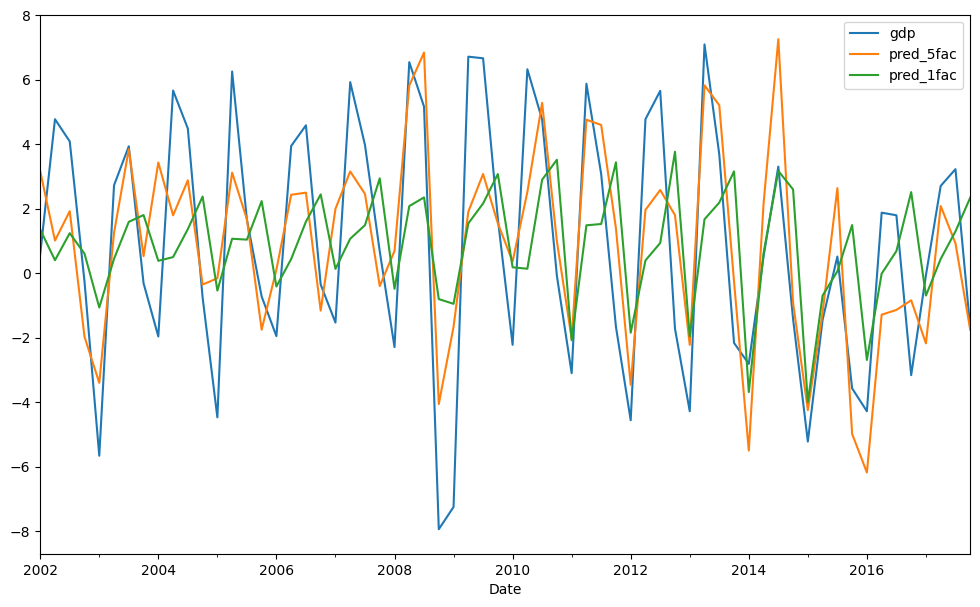

In [61]:
forecasts_insample = pd.DataFrame()
forecasts_insample['gdp'] = y_train
forecasts_insample['pred_5fac'] = dfm_ols_5fac.predict(X5_train)
forecasts_insample['pred_1fac'] = dfm_ols_1fac.predict(X5_train.F1)
forecasts_insample.plot()

In [77]:
rmse_insample_5fac = np.sqrt(((y_train - dfm_ols_5fac.predict(X5_train)) ** 2).mean())
mae_insample_5fac = ((y_train - dfm_ols_5fac.predict(X5_train)).abs()).mean()
print(rmse_insample_5fac, mae_insample_5fac, sep = '\n\n')

2.4781441930732897

2.0994414626252094


In [78]:
rmse_insample_1fac = np.sqrt(((y_train - dfm_ols_1fac.predict(X5_train.F1)) ** 2).mean())
mae_insample_1fac = ((y_train - dfm_ols_1fac.predict(X5_train.F1)).abs()).mean()
print(rmse_insample_1fac, mae_insample_1fac, sep = '\n\n')

3.472707171177597

3.0020370476115925


<AxesSubplot: xlabel='Date'>

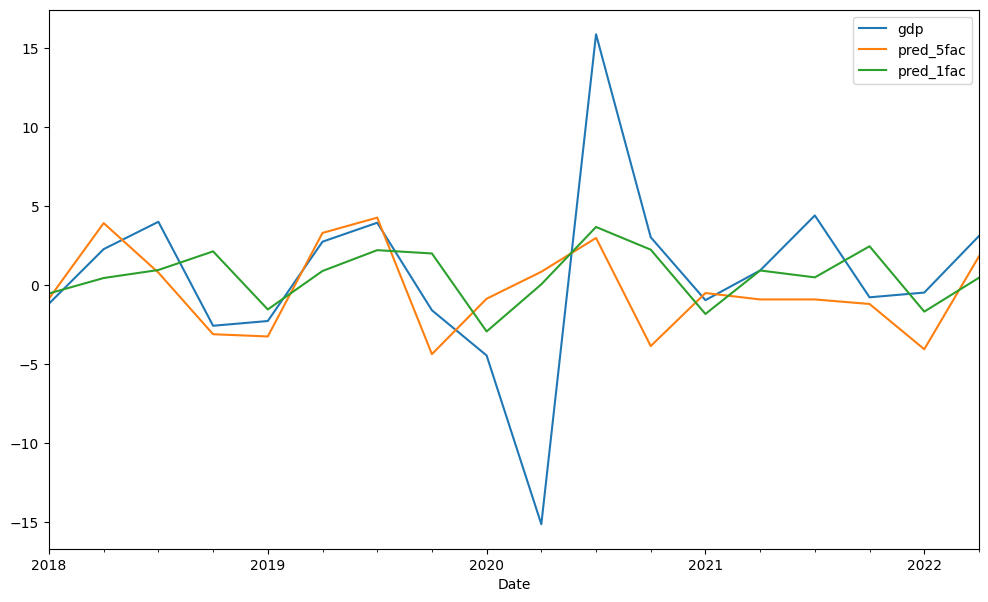

In [63]:
forecasts_outsample = pd.DataFrame()
forecasts_outsample['gdp'] = y_test
forecasts_outsample['pred_5fac'] = dfm_ols_5fac.predict(X5_test)
forecasts_outsample['pred_1fac'] = dfm_ols_1fac.predict(X5_test.F1)
forecasts_outsample.plot()

In [79]:
rmse_outsample_5fac = np.sqrt(((y_test - dfm_ols_5fac.predict(X5_test)) ** 2).mean())
mae_outsample_5fac = ((y_test - dfm_ols_5fac.predict(X5_test)).abs()).mean()
print(rmse_outsample_5fac, mae_outsample_5fac, sep = '\n\n')

5.532067230829383

3.477526393093017


In [80]:
rmse_outsample_1fac = np.sqrt(((y_test - dfm_ols_1fac.predict(X5_test.F1)) ** 2).mean())
mae_outsample_1fac = ((y_test - dfm_ols_1fac.predict(X5_test.F1)).abs()).mean()
print(rmse_outsample_1fac, mae_outsample_1fac, sep = '\n\n')

5.122732853021877

3.316986332406484
